# Text Emotion Detection

---
####Chris Pamula S20190010133
####S Sai Tarun S20190010157
####L Kranthi Kusal S20190010107
####S Charan Teja S20190010170


### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import re, math
from sklearn.metrics import confusion_matrix , classification_report

### Uploading files ( dataset )

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving test.txt to test.txt
Saving train.txt to train.txt
Saving val.txt to val.txt


In [ ]:
train_data = pd.read_csv("/content/train.txt", header = None)
# validation_data = pd.read_csv("/content/val.txt", header = None)
test_data = pd.read_csv("/content/test.txt", header = None)

In [ ]:
train_data.head()

,0
0,i didnt feel humiliated;sadness
1,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wro...
3,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy;anger


In [ ]:
# validation_data.head()

In [ ]:
test_data.head()

,0
0,im feeling rather rotten so im not very ambiti...
1,im updating my blog because i feel shitty;sadness
2,i never make her separate from me because i do...
3,i left with my bouquet of red and yellow tulip...
4,i was feeling a little vain when i did this on...


### Data Cleaning

In [ ]:
def rename_column(dataset):
  dataset.rename(columns = {0 : 'description'}, inplace = True)
  return dataset

In [ ]:
rename_column(train_data)
# rename_column(validation_data)
rename_column(test_data)

,description
0,im feeling rather rotten so im not very ambiti...
1,im updating my blog because i feel shitty;sadness
2,i never make her separate from me because i do...
3,i left with my bouquet of red and yellow tulip...
4,i was feeling a little vain when i did this on...
...,...
1995,i just keep feeling like someone is being unki...
1996,im feeling a little cranky negative after this...
1997,i feel that i am useful to my people and that ...
1998,im feeling more comfortable with derby i feel ...


In [ ]:
def separate_emotion(dataset):
    dataset[["text", "emotion"]] = dataset["description"].str.split(";", expand = True)
    dataset = dataset.drop("description", axis = 1)
    return dataset

In [ ]:
train_data = separate_emotion(train_data)
# validation_data = separate_emotion(validation_data)
test_data = separate_emotion(test_data)

In [ ]:
train_data.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
emotions_encoded = {"anger": 0, "fear": 1, "joy": 2, "love": 3, "sadness": 4, "surprise": 5}

In [ ]:
def encode_emotions(dataset):
    dataset.replace(emotions_encoded, inplace = True)
    return dataset

In [ ]:
encode_emotions(train_data)
# encode_emotions(validation_data)
encode_emotions(test_data)

,text,emotion
0,im feeling rather rotten so im not very ambiti...,4
1,im updating my blog because i feel shitty,4
2,i never make her separate from me because i do...,4
3,i left with my bouquet of red and yellow tulip...,2
4,i was feeling a little vain when i did this one,4
...,...,...
1995,i just keep feeling like someone is being unki...,0
1996,im feeling a little cranky negative after this...,0
1997,i feel that i am useful to my people and that ...,2
1998,im feeling more comfortable with derby i feel ...,2


In [ ]:
def separating_features_labels(dataset):
  features = dataset["text"].to_numpy()
  labels = dataset["emotion"].to_numpy()
  return (features, labels)

In [ ]:
(train_features, train_labels) = separating_features_labels(train_data)
# (validation_features, validation_labels) = separating_features_labels(validation_data)
(test_features, test_labels) = separating_features_labels(test_data)

### Removing stop words

Stop words are filler words, which are words with little or no meaning. These words do not have much role in emotion detection. We are defining the stopwords in a list so that they can be removed from the sentences.

In [ ]:
stop_words = ['ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 
              'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 
              'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'is', 's', 'am', 'or', 'who', 
              'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 
              'these', 'your', 'his', 'through', 'don', 'me', 'were', 'her', 'more', 'himself', 
              'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to',
              'ours', 'had', 'she', 'all', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 
              'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because',
              'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 
              'herself', 'has', 'just', 'where', 'only', 'myself', 'which', 'those', 'i', 
              'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 
              'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than',
              'ti','ame',' m','have','i','say','ames','someti'
              ]

my_decontract_dict = {"won't":"will not", "can't":"can not","n't":" not", 
                          "'re":" are","'s been":" has been","'s":" is","'d":" would","'ll":" will",
                          "'t":" not", "ve":" have", "'m":" am", "im":"i am"}

In [ ]:
def decontractions(text):
    for c in list(my_decontract_dict.keys()):  
      text = text.replace(c,my_decontract_dict[c])
    return text
def remove_stopwords(input_text):
    words = decontractions(input_text).split()
    clean_words = [word for word in words if word not in stop_words]
    clean_words = " ".join(clean_words)
    return clean_words
def cleaner(sent):
    sent = re.sub("@[A-Za-z0-9]+","",sent) # /@tarun 
    sent = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", sent)
    sent = " ".join(sent.split())
    sent = sent.replace("#", "").replace("_", " ")
    return sent

In [ ]:
train_data["text"] = train_data["text"].apply(remove_stopwords)
# validation_data["text"] = validation_data["text"].apply(remove_stopwords)
test_data["text"] = test_data["text"].apply(remove_stopwords)

In [ ]:
train_features

array(['didnt feel humiliated',
       'go feeling hopeless damned hopeful around someone cares awake',
       'grabbing minute post feel greedy wrong', ...,
       'feel strong good o haverall', 'feel like rude comment glad',
       'know lot feel stupid portray'], dtype=object)

In [ ]:
print(set(train_labels))

{0, 1, 2, 3, 4, 5}


## N grams

We created a function for obtaining n grams for the given corpus. It takes a sentence and the n value and returns the n grams for the given sentence.

In [ ]:
def getNgrams(text,ngram=1): #text : i am tarun
  words=[word for word in text.split(" ")] # [i, am, tarun]
  X = [words[i:] for i in range(0,ngram)] #[[i,am,tarun],[am,tarun]]
  temp=zip(*[words[i:] for i in range(0,ngram)]) #[(i,am),(am,tarun)]
  ans=[' '.join(ngram) for ngram in temp] #[ i am, am tarun ]
  return ans

In [ ]:
ngram_value = int(input("ngram: "))

ngram: 1


In [ ]:
getNgrams("i am chris", 2)

['i am', 'am chris']

#Word Index

Creating a dictionary for the word frequencies. We counted the frequencies of the terms present in the corpus. 

In [ ]:
def createWordIndex(sentlist,ngram=1):
  cnt = 0
  word_index = {}
  for sent in sentlist:
    cnt+=1
    for word in getNgrams(sent,ngram):
      if word not in word_index:
        word_index[word] = 1
      else:
        word_index[word] += 1
  return word_index, cnt

In [ ]:
index = {} #index : { 
           #  0: {
           #    token : freq
           #  },
           #  1: {
           #    token :freq
           #  },
           #  ..
           #  }
count = {}
for i in range(6):
  index[i],count[i] = createWordIndex(train_data.loc[train_data["emotion"]  == i]["text"],ngram_value)

In [ ]:
# index

### prior probabilities

In [ ]:
sum(count.values())

16000

In [ ]:
for i in range(6):
  print(count[i])

2159
1937
5362
1304
4666
572


In [ ]:
for i in range(6):
  prior[i] = count[i]/sum(count.values())

In [ ]:
print("Prior Probabilities: ")
prior

Prior Probabilities: 


{0: 0.1349375, 1: 0.1210625, 2: 0.335125, 3: 0.0815, 4: 0.291625, 5: 0.03575}

In [ ]:
sum(prior.values())

1.0

# Testing

In [ ]:
test_y = test_data

# Naive Bayes Theorem

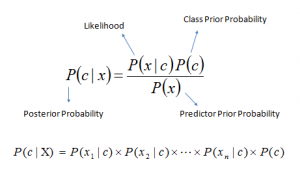

---



In [ ]:
#p(anger|'i didnt feel humiliated') = p('i'|anger) * p('didnt'|anger) * p('feel'|anger) * p('humiliated'|anger) * p(anger)
#p(joy|'i didnt feel humiliated') = p('i'|joy) * p('didnt'|joy) * p('feel'|joy) * p('humiliated'|joy) * p(joy)

#p(anger|'i didnt feel humiliated') = p('<s> i')* p('i didnt'|anger) * p('didnt feel'|anger) * p('feel humiliated'|anger) * p('</s> i')* p(anger)

#### p(word|class) = count(word in class) / count(total number of words in class)

In [ ]:
def logPrediction(sent):
  ind = 0
  clas = -10000
  for emot in range(6):
    res = 0
    for word in getNgrams(sent,ngram_value):
      try:
        res += math.log((index[emot][word] +1)/len(index[emot]))
      except:
        res += math.log(1/ len(index[emot]))
    res += math.log(prior[emot])
    if res > clas:
      clas = res
      ind = emot
  return ind

In [ ]:
logPrediction("I am not deeply happy")

2

In [ ]:
pred = []
for sent in test_y.text:
  pred.append(logPrediction(sent))

In [ ]:
# pred

In [ ]:
counter = {}

for val in pred:
    if val not in counter:
        counter[val] = 0
    counter[val] += 1
counter

{0: 152, 1: 144, 2: 798, 3: 54, 4: 815, 5: 37}

##Confusion Matrix

In [ ]:
confusion_matrix(test_y["emotion"], pred, labels=[0,1,2,3,4,5])

array([[143,   7,  27,   0,  90,   8],
       [  5, 123,  22,   1,  72,   1],
       [  0,   3, 640,   5,  40,   7],
       [  3,   0,  72,  48,  34,   2],
       [  1,   3,  17,   0, 558,   2],
       [  0,   8,  20,   0,  21,  17]])

#Report

In [ ]:
print(classification_report(test_y["emotion"], pred, labels=[0,1,2,3,4,5]))

              precision    recall  f1-score   support

           0       0.94      0.52      0.67       275
           1       0.85      0.55      0.67       224
           2       0.80      0.92      0.86       695
           3       0.89      0.30      0.45       159
           4       0.68      0.96      0.80       581
           5       0.46      0.26      0.33        66

    accuracy                           0.76      2000
   macro avg       0.77      0.58      0.63      2000
weighted avg       0.79      0.76      0.74      2000

